In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import sys
# setting path
sys.path.append("/content/drive/MyDrive/simclr")
sys.path.append("/content/drive/MyDrive/simclr/layers")
sys.path.append("/content/drive/MyDrive/simclr/models")
sys.path.append("/content/drive/MyDrive/simclr/loss")
sys.path.append("/content/drive/MyDrive/simclr/optim")
sys.path.append("/content/drive/MyDrive/simclr/dataloader")
sys.path.append("/content/drive/MyDrive/simclr/instance-discrim")
sys.path.append("/content/drive/MyDrive/simclr/instance-discrim/dloader")

In [3]:
from simclr import SimClr
from ntxent import nt_xent_loss
from ntxentgit import SimCLR_Loss
from augment import TransformsSimCLR
from utils import *
from LARS import LARS
from downstream import DownStream
from dataloader import *
from ResNetCifar import ResNetCifar
from utilsInstance import *
from NCECriterion import *
from alias_multinomial import *
from Cifar10Instance import *
from dloadertest import *

In [4]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import pickle

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
dataset = Cifar10Instance()
train_loader = DataLoader(dataset,
                    batch_size=128,
                    shuffle=True,
                    drop_last=True,
                    num_workers=2)

Files already downloaded and verified


In [8]:
len_dtrain = 50000
output_dim = 2048
noise_count = 512
temp = 0.07
momentum = 0.9
criterion = NCECriterion(len_dtrain)

In [9]:
batchSize = 128
resnet = ResNetCifar("resnet50",batchSize,momentum,temp,noise_count).cuda()
lr = 0.03
momentum = 0.9
weight_decay = 1e-4
epochs = 100
optimizer = torch.optim.SGD(resnet.parameters(),lr,momentum= momentum,weight_decay= weight_decay)

In [10]:
resnet, avg_loss_epoch, mem = trainInstance(resnet,epochs,train_loader,criterion,optimizer,True,"/content/model-k512","/content/memory-k512")

Epoch: 0, step: 50/390, loss: 3125.46826171875
Epoch: 0, step: 100/390, loss: 3033.13330078125
Epoch: 0, step: 150/390, loss: 2940.429443359375
Epoch: 0, step: 200/390, loss: 2849.67724609375
Epoch: 0, step: 250/390, loss: 2758.4892578125
Epoch: 0, step: 300/390, loss: 2665.4306640625
Epoch: 0, step: 350/390, loss: 2571.37744140625
Epoch: 0 completed, average loss: 2858.651800380609, time taken: 0.4941994865735372 mins
Epoch: 1, step: 50/390, loss: 2405.09814453125
Epoch: 1, step: 100/390, loss: 2313.81005859375
Epoch: 1, step: 150/390, loss: 2231.354248046875
Epoch: 1, step: 200/390, loss: 2142.03271484375
Epoch: 1, step: 250/390, loss: 2048.76025390625
Epoch: 1, step: 300/390, loss: 1964.051513671875
Epoch: 1, step: 350/390, loss: 1876.9400634765625
Epoch: 1 completed, average loss: 2149.903141276042, time taken: 0.4872000892957052 mins
Epoch: 2, step: 50/390, loss: 1720.1419677734375
Epoch: 2, step: 100/390, loss: 1641.1219482421875
Epoch: 2, step: 150/390, loss: 1560.0142822265625


In [11]:
with open("/content/model-k512-log", "wb") as fp:   #Pickling
  pickle.dump(avg_loss_epoch, fp)

In [12]:
test_loader, training_labels = dloaders_test(128)

Files already downloaded and verified
Files already downloaded and verified


In [13]:
K = 5
knn_classifier = build_knn(mem,training_labels,K)
predicted_test_labels, labels = knn_predict(test_loader,knn_classifier,resnet)

In [14]:
get_accuracy(labels,predicted_test_labels)

0.20022035256410256

In [15]:
training_dataset = Cifar10Instance()
training_loader= DataLoader(training_dataset,
                    batch_size=50000,
                    shuffle=False,
                    drop_last=True,
                    num_workers=2)
training_images,training_labels,training_indexs  = next(iter(training_loader))

Files already downloaded and verified


In [16]:
test_imgs, test_labels  = next(iter(test_loader))

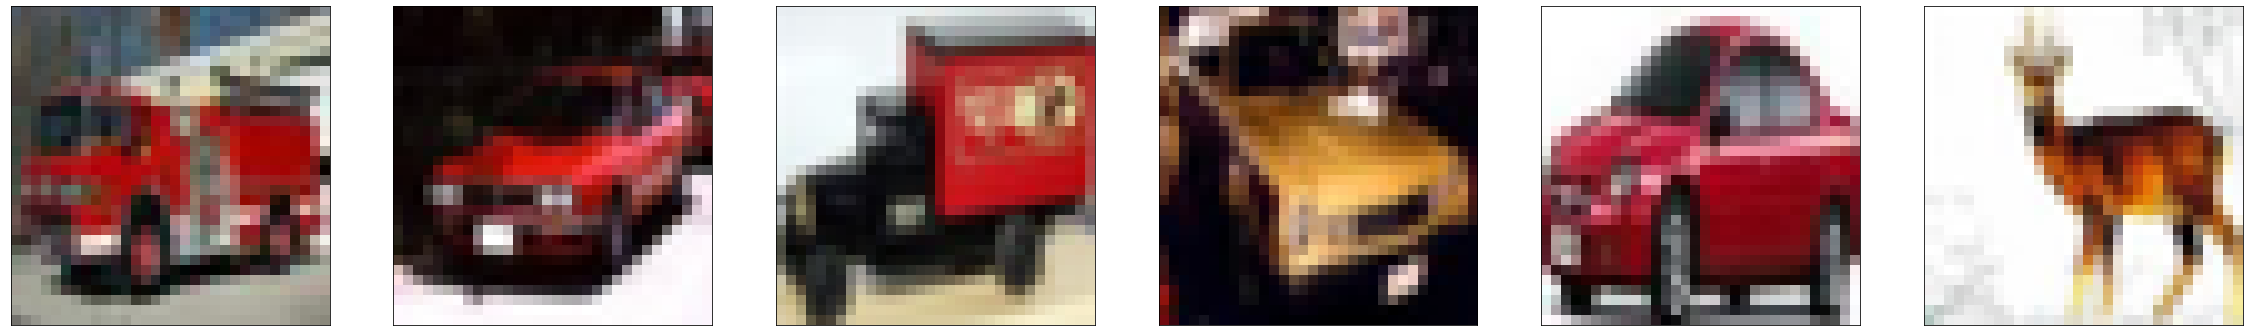

In [17]:
plotNeighbour(resnet,knn_classifier,test_imgs[23],training_images)

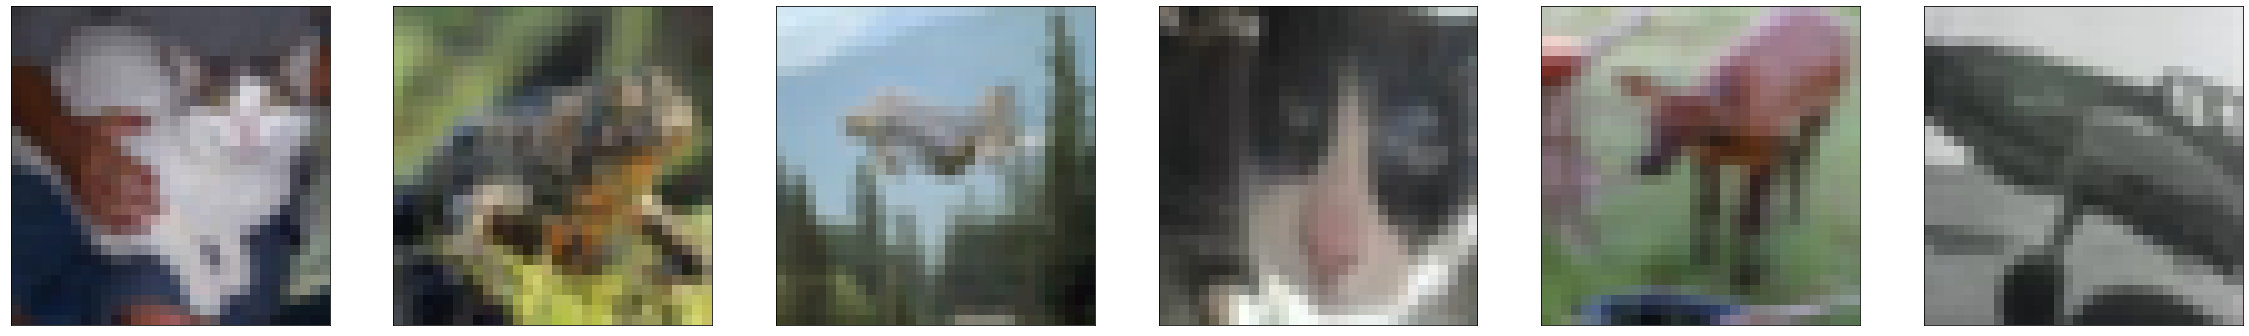

In [18]:
plotNeighbour(resnet,knn_classifier,test_imgs[77],training_images)

In [19]:
K = 3
knn_classifier = build_knn(mem,training_labels,K)
predicted_test_labels, labels = knn_predict(test_loader,knn_classifier,resnet)

In [20]:
get_accuracy(labels,predicted_test_labels)

0.18509615384615385